## GETTING LIBRARIES AND DATA

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from scipy import stats 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

# Modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

C:\Users\Dennis Nkansah\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load the data into a variable as 'data'**

In [2]:
data_1 = pd.read_excel('Data/Forest_data.xls')
data_2 = pd.read_excel('Data/Forest_data_2.xls')
data_3 = pd.read_excel('Data/Forest_data_3.xls')
data_4 = pd.read_excel('Data/Forest_data_4.xls')

data = pd.concat([data_1, data_2, data_3, data_4], axis = 0)

## Data Exploration

**Explore the main features**

In [3]:
data.shape

(8429, 15)

In [4]:
data.head()

,adress_forest,stand_struct_cd,sub_area,site_type_cd,storey_cd,density_cd,standdensity_index,species_cd,species_rank_order,part_cd,species_age,bhd,height,basal_area,volume
0,1-01-1 -c -00,DRZEW,1.60,BM¦W,DRZEW,UM,0.7,SO,1,10,75,28,24,22.20,269.882326
1,1-01-1 -m -00,DRZEW,1.40,B¦W,DRZEW,UM,1.0,SO,1,10,65,23,22,38.67,373.297072
2,1-01-1 -o -00,DRZEW,1.71,BM¦W,DRZEW,PRZ,0.7,SO,1,10,81,28,22,20.97,236.075456
3,1-01-1 -s -00,DRZEW,3.87,BM¦W,DRZEW,PRZ,0.8,SO,1,9,101,37,24,22.40,258.815546
4,1-01-1 -t -00,DRZEW,1.95,BM¦W,DRZEW,UM,0.9,SO,1,10,60,22,23,36.00,394.580126


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8429 entries, 0 to 2095
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adress_forest       8429 non-null   object 
 1   stand_struct_cd     8429 non-null   object 
 2   sub_area            8429 non-null   float64
 3   site_type_cd        8429 non-null   object 
 4   storey_cd           8429 non-null   object 
 5   density_cd          8429 non-null   object 
 6   standdensity_index  8429 non-null   float64
 7   species_cd          8429 non-null   object 
 8   species_rank_order  8429 non-null   int64  
 9   part_cd             8429 non-null   int64  
 10  species_age         8429 non-null   int64  
 11  bhd                 8429 non-null   int64  
 12  height              8429 non-null   int64  
 13  basal_area          8429 non-null   float64
 14  volume              8421 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.0+ M

In [6]:
data[data.duplicated(subset =['adress_forest'], keep = 'last')]

,adress_forest,stand_struct_cd,sub_area,site_type_cd,storey_cd,density_cd,standdensity_index,species_cd,species_rank_order,part_cd,species_age,bhd,height,basal_area,volume
15,1-02-38 -a -00,DRZEW,2.63,BM¦W,DRZEW,UM,1.1,SO,1,10,114,37,24,36.00,376.983288
41,1-01-12 -d -00,DRZEW,1.59,BS,DRZEW,PRZ,0.7,SO,1,10,65,14,11,25.33,119.035738
53,1-01-21 -d -00,DRZEW,1.76,B¦W,DRZEW,PRZ,0.9,SO,1,10,80,19,13,28.00,185.596904
68,1-01-39 -f -00,DRZEW,1.89,B¦W,DRZEW,UM,1.0,SO,1,10,95,22,15,31.20,221.589320
70,1-01-40 -g -00,DRZEW,2.42,B¦W,DRZEW,PE£,0.8,SO,1,10,49,8,9,28.00,93.679904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,1-05-203 -k -00,2 PIÊ,2.40,LM¦W,IP,LU¬,0.3,SO,1,10,113,41,27,11.10,138.728740
1775,1-03-11 -d -99,2 PIÊ,11.33,BM¦W,IP,PRZ,0.9,SO,1,10,113,35,25,27.20,330.218223
1777,1-03-11 -d -01,KO,1.65,BM¦W,IP,PRZ,0.0,SO,1,10,113,35,25,27.20,NaN
1824,2-13-398 -g -99,DRZEW,2.99,BM¦W,IP,UM,0.5,BRZ,1,10,82,28,25,18.40,208.359085


Using the adress_forest which serves as a primary key to detect if any the number of duplicated entries, it found out that 159
records are duplaced, this will therefore be dropped from the data before further processing.

In [7]:
data = data.drop_duplicates(subset=['adress_forest'], keep = 'last')

In [8]:
data.shape

(8270, 15)

**Checking for null values**

In [9]:
null_percent_df = pd.DataFrame(data.isna().sum()/len(data))

In [10]:
null_percent_df

,0
adress_forest,0.000000
stand_struct_cd,0.000000
sub_area,0.000000
site_type_cd,0.000000
storey_cd,0.000000
density_cd,0.000000
standdensity_index,0.000000
species_cd,0.000000
species_rank_order,0.000000
part_cd,0.000000


In [11]:
data['volume'] = data['volume'].fillna(np.mean(data['volume']))

In [12]:
data.isna().sum()

adress_forest         0
stand_struct_cd       0
sub_area              0
site_type_cd          0
storey_cd             0
density_cd            0
standdensity_index    0
species_cd            0
species_rank_order    0
part_cd               0
species_age           0
bhd                   0
height                0
basal_area            0
volume                0
dtype: int64

**Counting unique values and checking for outliers**

In [13]:
data['stand_struct_cd'].value_counts()

DRZEW    7989
KO        215
KDO        57
2 PIÊ       9
Name: stand_struct_cd, dtype: int64

In [14]:
data['sub_area'].value_counts()

1.92     39
2.00     37
2.11     36
1.72     35
1.70     34
         ..
12.99     1
7.97      1
0.51      1
10.46     1
9.13      1
Name: sub_area, Length: 1349, dtype: int64

In [15]:
data['site_type_cd'].value_counts()

B¦W     4819
BM¦W    2400
LM¦W     536
L¦W      136
BS       118
BMW      106
LMW       38
OLJ       35
BW        31
LW        26
OL        16
L£         9
Name: site_type_cd, dtype: int64

It seems better to combine some data categories

In [16]:
data['storey_cd'].value_counts()

DRZEW    8255
IIP        12
IP          3
Name: storey_cd, dtype: int64

A huge data inbalance exist for this category

In [17]:
data['density_cd'].value_counts()

UM     5682
PRZ    2162
PE£     386
LU¬      40
Name: density_cd, dtype: int64

In [18]:
data['standdensity_index'].value_counts()

0.9    2145
0.8    2017
1.0    1350
0.7    1155
0.6     569
1.1     524
0.5     207
1.2     143
0.4      83
0.3      19
1.3      19
0.2      18
0.0       9
0.1       6
1.5       2
1.7       1
1.4       1
1.6       1
1.8       1
Name: standdensity_index, dtype: int64

In [19]:
data['species_cd'].value_counts()

SO      7890
BRZ      113
DB        91
OL        49
AK        37
¦W        26
BK        23
JS        16
DG         8
SO.W       3
TP         3
JW         2
GB         2
SO.C       2
DB.S       1
OS         1
LP         1
MD         1
DB.C       1
Name: species_cd, dtype: int64

The forest stand shows an obvious domination of SO species, an approach to combine some species types will be adopted

In [20]:
data['species_rank_order'].value_counts()

1    8270
Name: species_rank_order, dtype: int64

since this category only contains one unique value, this column will be dropped

In [21]:
data['part_cd'].value_counts()

10    6468
9      494
8      490
7      340
6      256
5      159
4       54
3        9
Name: part_cd, dtype: int64

In [22]:
data['species_age'].value_counts()

73     288
78     242
83     206
68     198
93     192
      ... 
26       1
145      1
160      1
168      1
124      1
Name: species_age, Length: 116, dtype: int64

In [23]:
data['bhd'].value_counts()

24    502
23    482
25    473
22    456
21    454
     ... 
68      1
66      1
52      1
67      1
71      1
Name: bhd, Length: 61, dtype: int64

In [24]:
data['height'].value_counts()

19    809
18    799
21    765
20    724
17    708
22    667
16    635
23    565
15    466
24    447
14    358
13    274
25    240
12    188
11    157
26    123
10     91
27     77
9      51
8      49
28     44
7      12
29      9
31      6
30      4
33      1
48      1
Name: height, dtype: int64

In [25]:
data['basal_area'].value_counts()

28.00    719
32.00    624
29.33    466
30.67    397
33.33    334
        ... 
21.50      1
14.86      1
32.33      1
22.22      1
9.14       1
Name: basal_area, Length: 263, dtype: int64

In [26]:
data['volume'].value_counts()

242.516599    6
294.432026    3
246.428060    3
202.978584    3
277.430892    3
             ..
315.590917    1
199.420439    1
182.960523    1
262.714172    1
110.000000    1
Name: volume, Length: 8184, dtype: int64

## SUMMARY AND TO-DO-LIST AFTER FIRST CHECK OF THE DATA

Cleaning

- Remove the '¦' sign in the category column

FORMAT

- Column names format looks good and therefore requires no change or altering of names.

DROPPING:

- The adress_forest will be dropped because this will not play an important role in the prediction

- The species_rank_order will also be dropped since this contains only one unique value 



## Cleaning

In [27]:
## Remove '¦' sign in the column

data['site_type_cd'] = data['site_type_cd'].apply(lambda x: x.replace("¦", ""))

def clean_site_type(x):
    if x in ['LMW', 'L£']:
        return 'LW'
    elif x in ['OLJ', 'OL']:
        return 'OL'
    else:
        return x
    
data['site_type_cd'] = list(map(clean_site_type, data['site_type_cd']))
data['site_type_cd'].value_counts()
    

BW     4850
BMW    2506
LW      745
BS      118
OL       51
Name: site_type_cd, dtype: int64

I will combine all type with 'L', which denotes broadleaves forest, 'O' also together and maintain the different groups within 'B' in order to slightly balance the distribution

In [28]:
def clean_stand_struct(x):
    if x in ['KO', 'KDO',]:
        return 'KDO'
    else:
        return 'DRZEW'

data['stand_struct_cd'] = list(map(clean_stand_struct, data['stand_struct_cd']))
data['stand_struct_cd'].value_counts()

DRZEW    7998
KDO       272
Name: stand_struct_cd, dtype: int64

In [29]:
# Round the volume figures to two decimal places

def two_decimal(data):
    return round(data, 2)
    
data['volume'] = list(map(two_decimal, data['volume']))

In [30]:
data['site_type_cd'].value_counts()

BW     4850
BMW    2506
LW      745
BS      118
OL       51
Name: site_type_cd, dtype: int64

In [31]:
data.head()

,adress_forest,stand_struct_cd,sub_area,site_type_cd,storey_cd,density_cd,standdensity_index,species_cd,species_rank_order,part_cd,species_age,bhd,height,basal_area,volume
0,1-01-1 -c -00,DRZEW,1.60,BMW,DRZEW,UM,0.7,SO,1,10,75,28,24,22.20,269.88
1,1-01-1 -m -00,DRZEW,1.40,BW,DRZEW,UM,1.0,SO,1,10,65,23,22,38.67,373.30
2,1-01-1 -o -00,DRZEW,1.71,BMW,DRZEW,PRZ,0.7,SO,1,10,81,28,22,20.97,236.08
3,1-01-1 -s -00,DRZEW,3.87,BMW,DRZEW,PRZ,0.8,SO,1,9,101,37,24,22.40,258.82
4,1-01-1 -t -00,DRZEW,1.95,BMW,DRZEW,UM,0.9,SO,1,10,60,22,23,36.00,394.58


In [32]:
## Remove the '¬'and '£'signs and replace with "" and "E" respectively

data['density_cd'] = data['density_cd'].apply(lambda x: x.replace('¬', ""))

data['density_cd'] = data['density_cd'].apply(lambda x: x.replace('£', "E"))

data['species_cd'] = data['species_cd'].apply(lambda x: x.replace('¦', ""))

**Drop adress_forest and species_rank_order from the dataset**

In [33]:
data = data.drop(['adress_forest', 'species_rank_order', 'storey_cd'], axis =1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8270 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stand_struct_cd     8270 non-null   object 
 1   sub_area            8270 non-null   float64
 2   site_type_cd        8270 non-null   object 
 3   density_cd          8270 non-null   object 
 4   standdensity_index  8270 non-null   float64
 5   species_cd          8270 non-null   object 
 6   part_cd             8270 non-null   int64  
 7   species_age         8270 non-null   int64  
 8   bhd                 8270 non-null   int64  
 9   height              8270 non-null   int64  
 10  basal_area          8270 non-null   float64
 11  volume              8270 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 839.9+ KB


**Changing data types**

In [35]:
#data = data.astype({'part_cd': 'number'})

**Plot a correlation matrix**

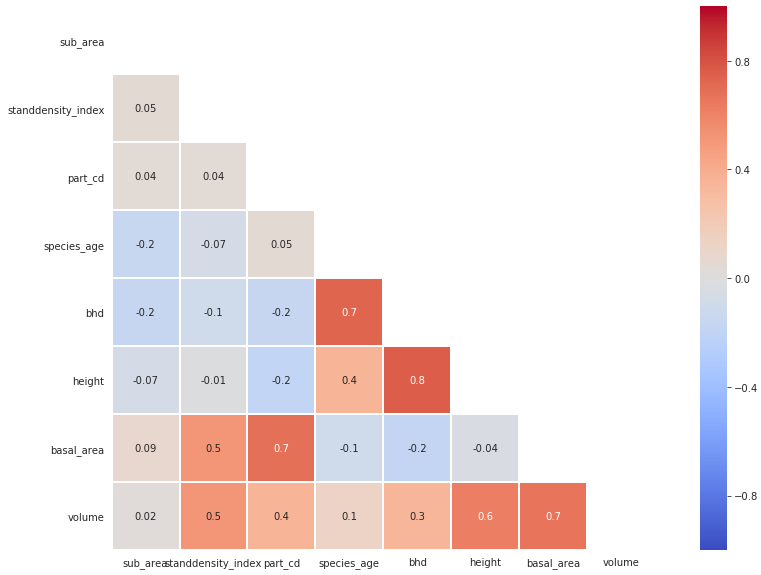

In [36]:

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(data.corr(), mask=mask,
                     square=True, annot=True, linewidths=1, cmap="coolwarm",
                     vmax = 1, vmin = -1, fmt='.1g')

In [109]:
data.columns

Index(['stand_struct_cd', 'sub_area', 'site_type_cd', 'density_cd',
       'standdensity_index', 'species_cd', 'part_cd', 'species_age', 'bhd',
       'height', 'basal_area', 'volume'],
      dtype='object')

In [120]:
height = data['height']
stand = data['stand_struct_cd']
sub_area = data['sub_area']
site_type_cd = data['site_type_cd']
density_cd = data['density_cd']
species_age = data['species_age']
bhd = data['bhd']
basal_area = data['basal_area']
volume = data['volume']

<Figure size 1152x576 with 0 Axes>

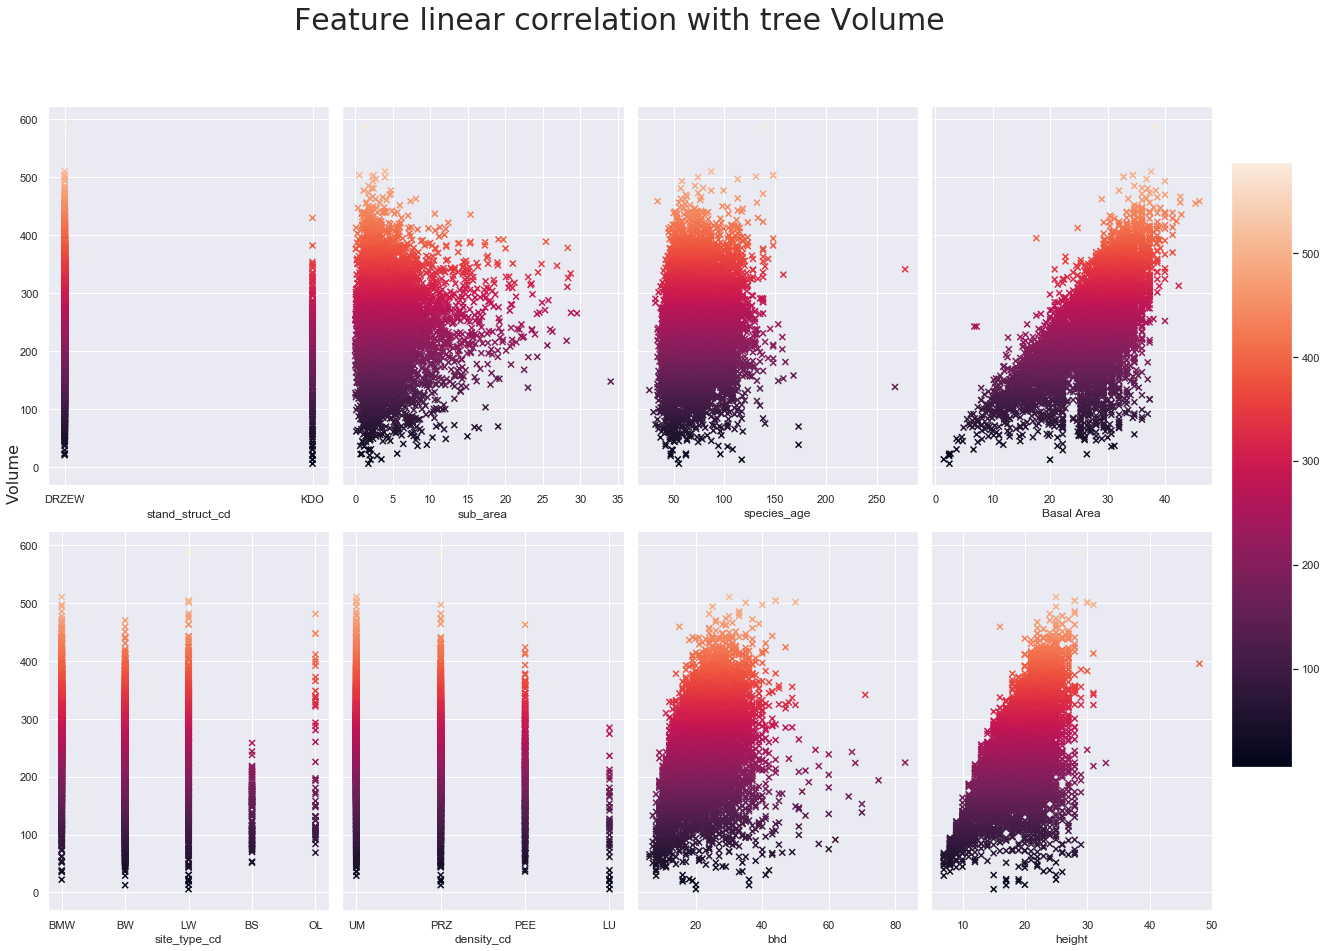

In [187]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Feature linear correlation with tree Volume', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Volume', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(stand, volume, c = volume, marker = "x")
axes[0][0].set_xlabel('stand_struct_cd')

axes[0][1].scatter(sub_area, volume, c = volume, marker = "x")
axes[0][1].set_xlabel('sub_area')

axes[1][0].scatter(site_type_cd, volume, c = volume, marker = "x")
axes[1][0].set_xlabel('site_type_cd')

axes[1][1].scatter(density_cd, volume, c = volume, marker = "x")
axes[1][1].set_xlabel('density_cd')

axes[0][2].scatter(species_age, volume, c = volume, marker = "x")
axes[0][2].set_xlabel('species_age')

axes[1][2].scatter(bhd, volume, c = volume, marker = "x")
axes[1][2].set_xlabel('bhd')

sc = axes[0][3].scatter(basal_area, volume, c = volume, marker = "x")
axes[0][3].set_xlabel('Basal Area')

sc = axes[1][3].scatter(height, volume, c = volume, marker = "x")
axes[1][3].set_xlabel('height')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()


 Plot showing graphical correlation with target variable and also given in the Heatmap

## Visualizing with histograms to check distribution

Let's look at the distribution of variables in the dataset:

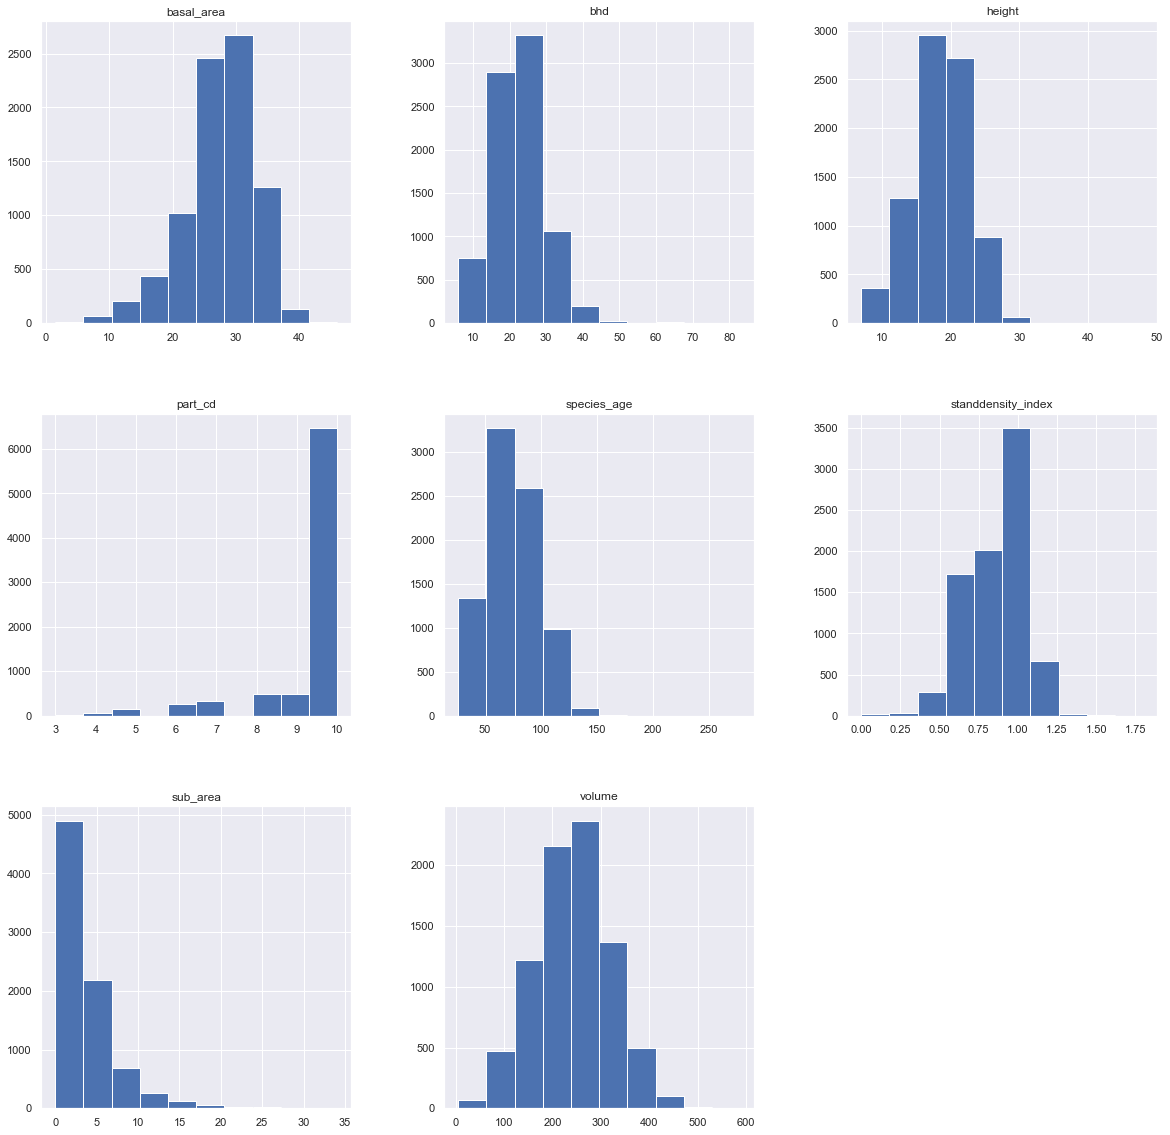

In [107]:
data.hist(figsize=(20,20));

## Spliting numerical and categorical data

In [39]:
numericals = data.select_dtypes(np.number)

In [40]:
numericals

,sub_area,standdensity_index,part_cd,species_age,bhd,height,basal_area,volume
0,1.60,0.7,10,75,28,24,22.20,269.88
1,1.40,1.0,10,65,23,22,38.67,373.30
2,1.71,0.7,10,81,28,22,20.97,236.08
3,3.87,0.8,9,101,37,24,22.40,258.82
4,1.95,0.9,10,60,22,23,36.00,394.58
...,...,...,...,...,...,...,...,...
2091,1.29,0.5,6,78,26,20,15.20,95.44
2092,3.06,0.6,10,98,28,18,20.72,185.36
2093,0.88,0.8,10,108,23,16,24.80,186.66
2094,2.80,0.5,8,110,33,19,14.80,132.19


In [41]:
categoricals = data.select_dtypes(include = object)

In [42]:
categoricals

,stand_struct_cd,site_type_cd,density_cd,species_cd
0,DRZEW,BMW,UM,SO
1,DRZEW,BW,UM,SO
2,DRZEW,BMW,PRZ,SO
3,DRZEW,BMW,PRZ,SO
4,DRZEW,BMW,UM,SO
...,...,...,...,...
2091,KDO,BW,PRZ,SO
2092,DRZEW,BW,PRZ,SO
2093,DRZEW,BW,PRZ,SO
2094,DRZEW,BW,PRZ,SO


In [45]:
dummies_df = pd.get_dummies(categoricals[['stand_struct_cd', 'site_type_cd', 'density_cd', 'species_cd']], drop_first=True)

In [46]:
dummies_df

,stand_struct_cd_KDO,site_type_cd_BS,site_type_cd_BW,site_type_cd_LW,site_type_cd_OL,density_cd_PEE,density_cd_PRZ,density_cd_UM,species_cd_BK,species_cd_BRZ,species_cd_DB,species_cd_DB.C,species_cd_DB.S,species_cd_DG,species_cd_GB,species_cd_JS,species_cd_JW,species_cd_LP,species_cd_MD,species_cd_OL,species_cd_OS,species_cd_SO,species_cd_SO.C,species_cd_SO.W,species_cd_TP,species_cd_W
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2092,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2093,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2094,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
data_full = pd.concat([numericals,dummies_df], axis = 1)

In [48]:
data_full

,sub_area,standdensity_index,part_cd,species_age,bhd,height,basal_area,volume,stand_struct_cd_KDO,site_type_cd_BS,site_type_cd_BW,site_type_cd_LW,site_type_cd_OL,density_cd_PEE,density_cd_PRZ,density_cd_UM,species_cd_BK,species_cd_BRZ,species_cd_DB,species_cd_DB.C,species_cd_DB.S,species_cd_DG,species_cd_GB,species_cd_JS,species_cd_JW,species_cd_LP,species_cd_MD,species_cd_OL,species_cd_OS,species_cd_SO,species_cd_SO.C,species_cd_SO.W,species_cd_TP,species_cd_W
0,1.60,0.7,10,75,28,24,22.20,269.88,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.40,1.0,10,65,23,22,38.67,373.30,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.71,0.7,10,81,28,22,20.97,236.08,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3.87,0.8,9,101,37,24,22.40,258.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.95,0.9,10,60,22,23,36.00,394.58,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,1.29,0.5,6,78,26,20,15.20,95.44,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2092,3.06,0.6,10,98,28,18,20.72,185.36,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2093,0.88,0.8,10,108,23,16,24.80,186.66,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2094,2.80,0.5,8,110,33,19,14.80,132.19,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [158]:
y = data_full['volume']
X = data_full.drop(['volume'], axis = 1)

In [159]:
## Model 1

# For the first multiple regression model, using only the numerical variables to determine how the prediction strength
# of the model



numerical_model = numericals.copy()
numerical_model = numerical_model.drop(['volume'], axis = 1)
model = sm.OLS(y, numerical_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 volume   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          5.078e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        14:36:29   Log-Likelihood:                         -41897.
No. Observations:                8270   AIC:                                  8.381e+04
Df Residuals:                    8263   BIC:                                  8.386e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sub_area              -0.8432      0.123     -6.880      0.000      -1.083      -0.603
standdensity_index    -3.3225      2.825     -1.176      0.240      -8.860       2.216
part_cd              -17.1605      0.375    -45.723      0.000     -17.896     -16.425
species_age           -0.4816      0.033    -14.508      0.000      -0.547      -0.417
bhd                    1.2836      0.143      8.964      0.000       1.003       1.564
height                 7.7542      0.171     45.353      0.000       7.419       8.089
basal_area             9.9604      0.128     77.838      0.000       9.710      10.211
==============================================================================
Omnibus:                     1449.173   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4012.951
Skew:                          -0.938   Prob(JB):                         0.00
Kurtosis:                       5.850   Cond. No.                         590.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(numerical_model, y, test_size=0.30, random_state=0)

# Linear Regression Model
regr = LinearRegression()
regr.fit(X_train_1, y_train_1)
print('Training data r-squared:', regr.score(X_train_1, y_train_1)) #model score
print('Linear Regression r2 score:', regr.score(X_test_1, y_test_1)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)


Training data r-squared: 0.9151497537326877
Linear Regression r2 score: 0.9137869166157788


In [189]:
## Model 2

# The second model is tested with all the features to determine if the model will perform better with all features or worst
# of the model

#The result indicates that the model is able to make better prediction of 0.994 with all features as against 0.987 with only the 
#numerical variables.

## Decision: Since there are only 12 features in the dataset, I have decided to include all in the model prediction. 

#Although, a bit of multicollinearity do exist amonng some features as shown in the heat map above but the highest among these is 0.7
#therefore, these features will all be included in the model design. 



y = data_full['volume']
X = data_full.drop(['volume'], axis = 1)

model_2 = sm.OLS(y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 volume   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.449e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        19:10:09   Log-Likelihood:                         -38541.
No. Observations:                8270   AIC:                                  7.715e+04
Df Residuals:                    8237   BIC:                                  7.738e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
sub_area               -0.1492      0.083     -1.805      0.071      -0.311       0.013
standdensity_index     80.1109      2.438     32.861      0.000      75.332      84.890
part_cd                 2.2444      0.356      6.298      0.000       1.546       2.943
species_age            -0.1951      0.025     -7.906      0.000      -0.243      -0.147
bhd                    -0.1791      0.103     -1.744      0.081      -0.380       0.022
height                 12.1420      0.138     87.936      0.000      11.871      12.413
basal_area              7.4279      0.099     74.870      0.000       7.233       7.622
stand_struct_cd_KDO   -64.7012      1.810    -35.743      0.000     -68.250     -61.153
site_type_cd_BS       -24.0288      2.608     -9.212      0.000     -29.142     -18.916
site_type_cd_BW        -7.7123      0.788     -9.785      0.000      -9.257      -6.167
site_type_cd_LW       -11.0424      1.182     -9.345      0.000     -13.359      -8.726
site_type_cd_OL       -22.2930      6.595     -3.380      0.001     -35.221      -9.365
density_cd_PEE       -164.7864      3.680    -44.777      0.000    -172.000    -157.572
density_cd_PRZ       -141.6619      3.443    -41.145      0.000    -148.411    -134.913
density_cd_UM        -145.7887      3.464    -42.090      0.000    -152.579    -138.999
species_cd_BK         -82.5898      6.414    -12.877      0.000     -95.163     -70.017
species_cd_BRZ       -130.7525      4.088    -31.988      0.000    -138.765    -122.740
species_cd_DB         -99.9616      4.271    -23.402      0.000    -108.335     -91.588
species_cd_DB.C      -119.4386     25.927     -4.607      0.000    -170.263     -68.615
species_cd_DB.S       -61.3486     25.873     -2.371      0.018    -112.067     -10.630
species_cd_DG         -84.1134      9.719     -8.654      0.000    -103.166     -65.061
species_cd_GB         -76.5891     18.532     -4.133      0.000    -112.916     -40.262
species_cd_JS        -119.5572      8.793    -13.597      0.000    -136.794    -102.320
species_cd_JW         -58.0218     18.508     -3.135      0.002     -94.302     -21.742
species_cd_LP        -147.7352     25.854     -5.714      0.000    -198.415     -97.055
species_cd_MD        -148.6523     25.873     -5.745      0.000    -199.371     -97.934
species_cd_OL         -83.4765      6.946    -12.018      0.000     -97.093     -69.860
species_cd_OS        -146.9818     25.840     -5.688      0.000    -197.634     -96.330
species_cd_SO        -106.3745      3.447    -30.859      0.000    -113.132     -99.617
species_cd_SO.C      -103.8987     18.464     -5.627      0.000    -140.092     -67.705
species_cd_SO.W      -111.6063     15.196     -7.344      0.000    -141.394     

In [164]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

# change this to a classifier, since we're predicting a categorical variable. Or use logistic regression.

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select= 23, verbose=False)
rfe.fit(X, y)
rfe.score(X, y)

0.9291412778540924

In [166]:
# After we run the algorithm, it labels the top features as 1 and the rest are
# marked in an increasing order of importance.

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
df[df['Rank']== 1]

,Rank,Column_name
1,1,standdensity_index
2,1,part_cd
5,1,height
6,1,basal_area
7,1,stand_struct_cd_KDO
8,1,site_type_cd_BS
11,1,site_type_cd_OL
12,1,density_cd_PEE
15,1,species_cd_BK
16,1,species_cd_BRZ


In [167]:
X.columns

Index(['sub_area', 'standdensity_index', 'part_cd', 'species_age', 'bhd',
       'height', 'basal_area', 'stand_struct_cd_KDO', 'site_type_cd_BS',
       'site_type_cd_BW', 'site_type_cd_LW', 'site_type_cd_OL',
       'density_cd_PEE', 'density_cd_PRZ', 'density_cd_UM', 'species_cd_BK',
       'species_cd_BRZ', 'species_cd_DB', 'species_cd_DB.C', 'species_cd_DB.S',
       'species_cd_DG', 'species_cd_GB', 'species_cd_JS', 'species_cd_JW',
       'species_cd_LP', 'species_cd_MD', 'species_cd_OL', 'species_cd_OS',
       'species_cd_SO', 'species_cd_SO.C', 'species_cd_SO.W', 'species_cd_TP',
       'species_cd_W'],
      dtype='object')

In [194]:
model = RandomForestRegressor(max_depth = 10).fit(X,y)
my_features = model.feature_importances_
y_pred = model.predict(X)
my_features = my_features.reshape(-1,1)
index = []
value = []
for i, val in enumerate(my_features):
    if val > 0:
        index.append(i)
        value.append(val)
features = {}
my_columns = []
for i, ii in zip(index,value):
    features[X.columns[i]] = round(float(ii),3)
    my_columns.append(X.columns[i])
RF_scores = cross_val_score(model, X, y, cv=5)
mean = np.mean(RF_scores)
print('The features weights in Random Forest model are {}'.format(features))
print('The mean score of Random Forest Regressor at max_depth = 23 is {}'.format(mean))

The features weights in Random Forest model are {'sub_area': 0.004, 'standdensity_index': 0.056, 'part_cd': 0.001, 'species_age': 0.008, 'bhd': 0.002, 'height': 0.463, 'basal_area': 0.447, 'stand_struct_cd_KDO': 0.014, 'site_type_cd_BS': 0.0, 'site_type_cd_BW': 0.0, 'site_type_cd_LW': 0.0, 'site_type_cd_OL': 0.0, 'density_cd_PEE': 0.0, 'density_cd_PRZ': 0.0, 'density_cd_UM': 0.0, 'species_cd_BK': 0.0, 'species_cd_BRZ': 0.0, 'species_cd_DB': 0.0, 'species_cd_DB.S': 0.0, 'species_cd_DG': 0.0, 'species_cd_GB': 0.0, 'species_cd_JS': 0.0, 'species_cd_JW': 0.0, 'species_cd_OL': 0.0, 'species_cd_SO': 0.002, 'species_cd_TP': 0.0, 'species_cd_W': 0.0}
The mean score of Random Forest Regressor at max_depth = 23 is 0.9346198630682435


In [173]:
new_columns = []
for item in X.columns:
    if item not in my_columns:
        new_columns.append(item)

for item in new_columns:
    X.drop(item,axis = 1, inplace = True)

X.shape

(8270, 23)

In [174]:
#XX = X.copy()

In [ ]:
## Feature selection with RFE and RandomForestRegressor produced exact 23 features and these were used in the module prediction

In [175]:
XX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8270 entries, 0 to 2095
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sub_area             8270 non-null   float64
 1   standdensity_index   8270 non-null   float64
 2   part_cd              8270 non-null   int64  
 3   species_age          8270 non-null   int64  
 4   bhd                  8270 non-null   int64  
 5   height               8270 non-null   int64  
 6   basal_area           8270 non-null   float64
 7   stand_struct_cd_KDO  8270 non-null   uint8  
 8   site_type_cd_BS      8270 non-null   uint8  
 9   site_type_cd_BW      8270 non-null   uint8  
 10  site_type_cd_LW      8270 non-null   uint8  
 11  site_type_cd_OL      8270 non-null   uint8  
 12  density_cd_PEE       8270 non-null   uint8  
 13  density_cd_PRZ       8270 non-null   uint8  
 14  density_cd_UM        8270 non-null   uint8  
 15  species_cd_BK        8270 non-null   u

In [153]:
## Using Grid Search for tune for the best parameters

from sklearn.model_selection import GridSearchCV

linear_search = GridSearchCV(estimator=LinearRegression(),
                            param_grid={"fit_intercept":[True, False],
                                        "normalize":[True, False],
                                        "copy_X" : [True,False]
                                        },
                            scoring="r2",
                            cv=10)
linear_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [89]:
linear_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [176]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=10)

# Linear Regression Model
regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regr.fit(X_train, y_train)
print('Training data r-squared:', regr.score(X_train, y_train)) #model score
print('Linear Regression r2 score:', regr.score(X_test, y_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)


Training data r-squared: 0.934393927464122
Linear Regression r2 score: 0.9278545131532885


In [177]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

r_2 = metrics.r2_score(y_test, regr.predict(X_test))
mae = metrics.mean_absolute_error(y_test, regr.predict(X_test))
mse = metrics.mean_squared_error(y_test, regr.predict(X_test))

print(f"The R-squared score: {r_2}")
print(f"The MAE score: {mae}")
print(f"The MSE score: {mse}")

The R-squared score: 0.9278545131532885
The MAE score: 14.571400097642918
The MSE score: 411.31938537646283


In [182]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const.astype(float))
results = model.fit()

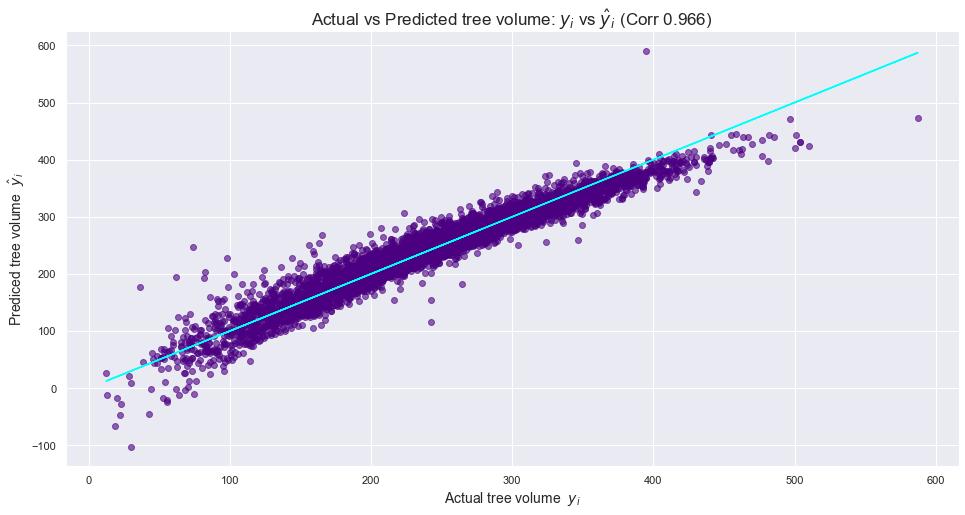

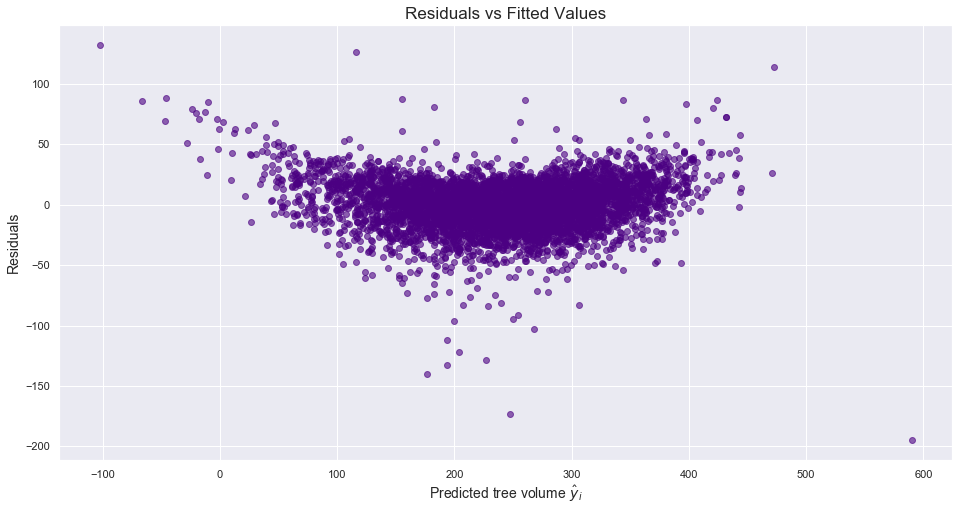

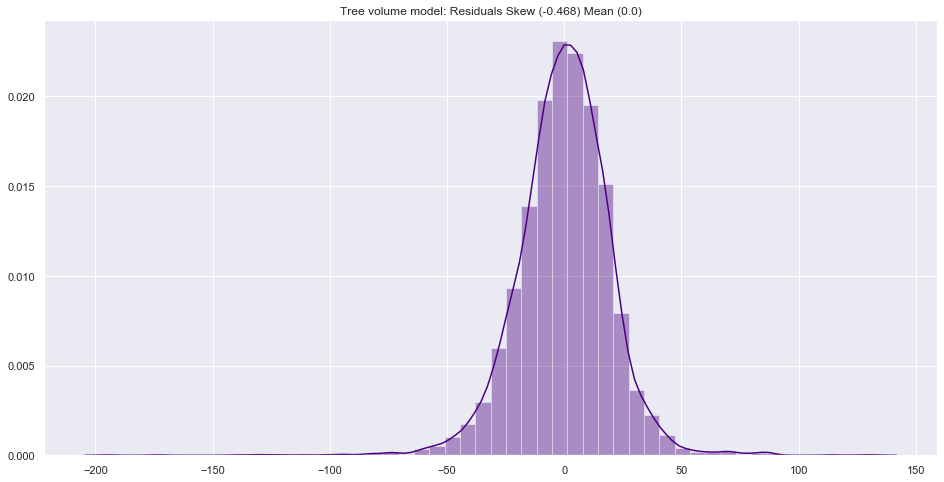

In [195]:
# Graph of Actual vs. Predicted log Prices
corr = round(y_train.corr(results.fittedvalues), 3)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual tree volume  $y _i$', fontsize=14)
plt.ylabel('Prediced tree volume  $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted tree volume: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
plt.xlabel('Predicted tree volume $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='indigo')
plt.title(f'Tree volume model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


## Support Vector Regression (SVR) using 18 features from the RFR model

In [178]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state=100)

SupportVectorRegModel = SVR()
SVR_model = SupportVectorRegModel.fit(X_train,y_train)

SVR_predictions = SVR_model.predict(X_test)

MAE_svr = mean_absolute_error(y_test,SVR_predictions)
MSE_svr = mean_squared_error(y_test,SVR_predictions)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test,SVR_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_svr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_svr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_svr))
print("The R2 of the model in the test set is: %4.2f" % (R2_svr))

The mean absolute error of the model in the test set is:  45.07
The mean squared error of the model in the test set is: 3842.55
The root mean squared error of the model in the test set is:  61.99
The R2 of the model in the test set is: 0.37


In [62]:
data.to_csv('data_clean.csv', index = False)